# DISSERTATION: CLASSIFICATION

Analysis & Algorithms

In [1]:
# connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# necessary libraries
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

## **Processing Labels**

In [ ]:
# path
all_files_path = ["/content/drive/MyDrive/Project/Classification/Dataset/train_FD001.txt", "/content/drive/MyDrive/Project/Classification/Dataset/train_FD002.txt",
              "/content/drive/MyDrive/Project/Classification/Dataset/train_FD003.txt", "/content/drive/MyDrive/Project/Classification/Dataset/train_FD004.txt",
              "/content/drive/MyDrive/Project/Classification/Dataset/test_FD001.txt", "/content/drive/MyDrive/Project/Classification/Dataset/test_FD002.txt",
              "/content/drive/MyDrive/Project/Classification/Dataset/test_FD003.txt", "/content/drive/MyDrive/Project/Classification/Dataset/test_FD004.txt"]


# iterating through all the files to fetch the training and testing data
for path in all_files_path:

  # loading file with heading
  dataframe = pd.read_csv(path, sep=' ', header = None)

  # dropping irrelevant data that comes due to file read
  dataframe = dataframe.drop([26,27], axis='columns')

  # adding column names to the dataframes
  dataframe.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3',
                       'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6',
                       'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12',
                       'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18',
                       'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']

  # defining end of life for each sample
  eol=[]
  for sample in dataframe['ID']:
          eol.append( ((dataframe[dataframe['ID'] == sample]["Cycle"]).values)[-1])

  # add this eol data as column in the dataframe
  dataframe["EOL"]=eol

  # calculate the ratio of cycle with eol
  dataframe["ratio"] = dataframe["Cycle"].div(dataframe["EOL"])

  # Drop ID and eol
  dataframe=dataframe.drop(columns=['ID','EOL'])

  #assign labels
  labels=[]
  for i in range (0,len(dataframe)):
      if np.array(dataframe["ratio"])[i] <= 0.6:
          labels.append(0)
      elif np.array(dataframe["ratio"])[i] <= 0.8 :
          labels.append(1)
      else :
          labels.append(2)

  dataframe["labels"]=labels
  dataframe  = dataframe.drop(columns=['ratio'])
  path = path.replace("data", "processed_data")
  print(path)
  dataframe.to_csv(path, index=False)


* Classes defined as:

Label 0: Good Condition

Label 1: Moderate Condition

Label 2: Warning Condition

## **Reading processed data**

- training
- testing

In [ ]:
# reading processed data
'''
  This section of code reads training and testing data files from the specified
  paths. This is done using pandas `read_csv` function that can also read files
  of other formats.
'''

df1_train = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/train_FD001.txt')
df2_train = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/train_FD002.txt')
df3_train = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/train_FD003.txt')
df4_train = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/train_FD004.txt')

df1_test = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/test_FD001.txt')
df2_test = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/test_FD002.txt')
df3_test = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/test_FD003.txt')
df4_test = pd.read_csv('/content/drive/MyDrive/Project/Classification/processed_data/test_FD004.txt')

In [ ]:
# Concatenating all the data
'''
  This section of code concatenates all the training data processed with labels (train_FD001, train_FD002, train_FD003, train_FD004)
  and testing data processed with labels (test_FD001, test_FD002, test_FD003, test_FD004) read in different variables into two different
  variables to form training and testing sets, respectively.
'''

training_data = pd.concat([df1_train,df2_train,df3_train,df4_train])
testing_data = pd.concat([df1_test,df2_test,df3_test,df4_test])

In [ ]:
# transformed data - training
training_data.head(3)

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0


In [ ]:
# transformed data - testing
testing_data.head(3)

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,...,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,0
1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,...,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,0
2,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,...,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,0


In [ ]:
print(f"Shape of training data: {training_data.shape}")
print(f"Shape of testing data: {testing_data.shape}")

Shape of training data: (160359, 26)
Shape of testing data: (104897, 26)


## **Statstical Analysis**

In [ ]:
# Dtypes information
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160359 entries, 0 to 61248
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cycle            160359 non-null  int64  
 1   OpSet1           160359 non-null  float64
 2   OpSet2           160359 non-null  float64
 3   OpSet3           160359 non-null  float64
 4   SensorMeasure1   160359 non-null  float64
 5   SensorMeasure2   160359 non-null  float64
 6   SensorMeasure3   160359 non-null  float64
 7   SensorMeasure4   160359 non-null  float64
 8   SensorMeasure5   160359 non-null  float64
 9   SensorMeasure6   160359 non-null  float64
 10  SensorMeasure7   160359 non-null  float64
 11  SensorMeasure8   160359 non-null  float64
 12  SensorMeasure9   160359 non-null  float64
 13  SensorMeasure10  160359 non-null  float64
 14  SensorMeasure11  160359 non-null  float64
 15  SensorMeasure12  160359 non-null  float64
 16  SensorMeasure13  160359 non-null  float

In [ ]:
# Statistical information for training data
training_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle,160359.0,123.331338,83.538146,1.0000,57.00000,114.0000,173.0000,543.0000
OpSet1,160359.0,17.211973,16.527988,-0.0087,0.00130,19.9981,35.0015,42.0080
OpSet2,160359.0,0.410004,0.367938,-0.0006,0.00020,0.6200,0.8400,0.8420
OpSet3,160359.0,95.724344,12.359044,60.0000,100.00000,100.0000,100.0000,100.0000
SensorMeasure1,160359.0,485.840890,30.420388,445.0000,449.44000,489.0500,518.6700,518.6700
SensorMeasure2,160359.0,597.361022,42.478516,535.4800,549.96000,605.9300,642.3400,645.1100
SensorMeasure3,160359.0,1467.035653,118.175261,1242.6700,1357.36000,1492.8100,1586.5900,1616.9100
SensorMeasure4,160359.0,1260.956434,136.300073,1023.7700,1126.83000,1271.7400,1402.2000,1441.4900
SensorMeasure5,160359.0,9.894999,4.265554,3.9100,5.48000,9.3500,14.6200,14.6200
SensorMeasure6,160359.0,14.424935,6.443922,5.6700,8.00000,13.6600,21.6100,21.6100


In [ ]:
# Statistical information for testing data
testing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle,104897.0,95.406589,74.311486,1.0000,38.0000,80.0000,135.0000,486.0000
OpSet1,104897.0,17.243810,16.530141,-0.0087,0.0013,19.9982,35.0015,42.0080
OpSet2,104897.0,0.410887,0.368078,-0.0006,0.0002,0.6200,0.8400,0.8420
OpSet3,104897.0,95.748591,12.328151,60.0000,100.0000,100.0000,100.0000,100.0000
SensorMeasure1,104897.0,485.791314,30.426804,445.0000,449.4400,489.0500,518.6700,518.6700
SensorMeasure2,104897.0,597.153354,42.430629,535.4100,549.7800,605.5300,642.2000,644.3200
SensorMeasure3,104897.0,1464.738375,117.856835,1240.9400,1355.1400,1490.1600,1584.8100,1609.6900
SensorMeasure4,104897.0,1257.240382,135.728855,1024.9000,1124.0300,1262.8500,1399.4600,1434.1200
SensorMeasure5,104897.0,9.887805,4.265536,3.9100,5.4800,9.3500,14.6200,14.6200
SensorMeasure6,104897.0,14.412914,6.443315,5.6600,8.0000,13.6600,21.6100,21.6100


## **Label Distribution for Classification**

### Distribution in training data

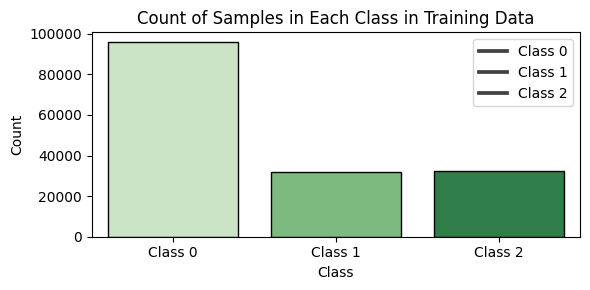

In [ ]:
class_counts = training_data['labels'].value_counts().sort_index()

# Set up the figure and axes
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='Greens')

# Add borders to bars
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Samples in Each Class in Training Data')
plt.xticks(ticks=class_counts.index, labels=[f'Class {i}' for i in class_counts.index])

# Add legend outside the plot
plt.legend(labels=['Class 0', 'Class 1', 'Class 2'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

### Distribution in testing data

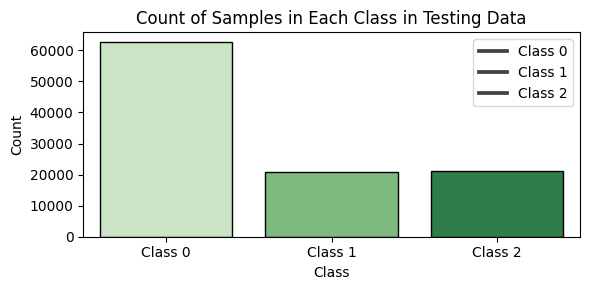

In [ ]:
class_counts = testing_data['labels'].value_counts().sort_index()

# Set up the figure and axes
plt.figure(figsize=(6, 3))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='Greens')

# Add borders to bars
for bar in ax.patches:
    bar.set_edgecolor('black')
    bar.set_linewidth(1)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Samples in Each Class in Testing Data')
plt.xticks(ticks=class_counts.index, labels=[f'Class {i}' for i in class_counts.index])

# Add legend outside the plot
plt.legend(labels=['Class 0', 'Class 1', 'Class 2'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

## **Split the Features and Label**

In [ ]:
# seperating dependent and independent variables
X_train = training_data.iloc[:,0:-1]
y_train = training_data.iloc[:,-1]

X_test = testing_data.iloc[:,0:-1]
y_test = testing_data.iloc[:,-1]

**X_train, X_test** is the Feature Matrix and **y_train, y_test** is the label's column

In [ ]:
# Respective Shapes of training and test sets

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (160359, 25)
Shape of y_train: (160359,)
Shape of X_test: (104897, 25)
Shape of y_test: (104897,)


## **Random Forest model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialising Random Forest Classifier instance
RF = RandomForestClassifier()

# Fitting the instance for training
start_time = time.time()
RF.fit(X_train, y_train)

print(f"Time(in seconds) taken to train a Random Forest Classifier: {time.time()-start_time}")

Time(in seconds) taken to train a Random Forest Classifier: 62.34324812889099


In [ ]:
print("Trained hyper-paraemters")
RF.get_params()

Trained hyper-paraemters


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### **Performance on Training set**

Accuracy on test set:  1.0


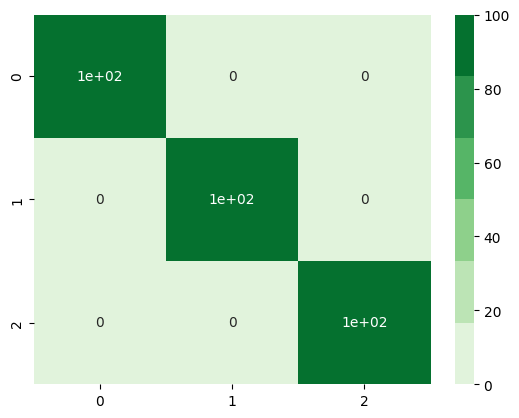

In [ ]:
# Predicting the labels using tarined instance `RF`
y_pred_RF = RF.predict(X_train)

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Greens")
sns.heatmap(cm, annot=True,cmap=colormap)

# Accuracy Score
print("Accuracy on train set: ", accuracy_score(y_train, y_pred_RF))

In [ ]:
print("Other relevant performance metrics")
print("Precision on train set: ", precision_score(y_train, y_pred_RF, average = 'weighted'))
print("Recall on train set: ", recall_score(y_train, y_pred_RF, average = 'weighted'))
print("F1 Score on train set: ", f1_score(y_train, y_pred_RF, average = 'weighted'))

Other relevant performance metrics
Precision on train set:  1.0
Recall on train set:  1.0
F1 Score on train set:  1.0


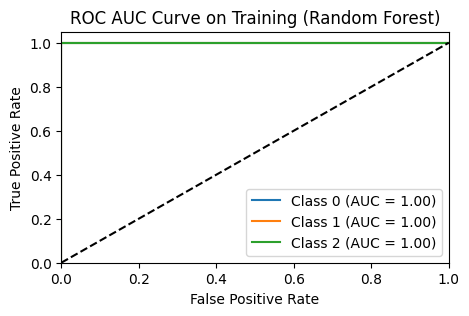

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = 3
y_score = RF.predict_proba(X_train)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve on Training (Random Forest)')
plt.legend(loc="lower right")
plt.show()

### **Performance on Testing set**

[[0.97 0.03 0.  ]]


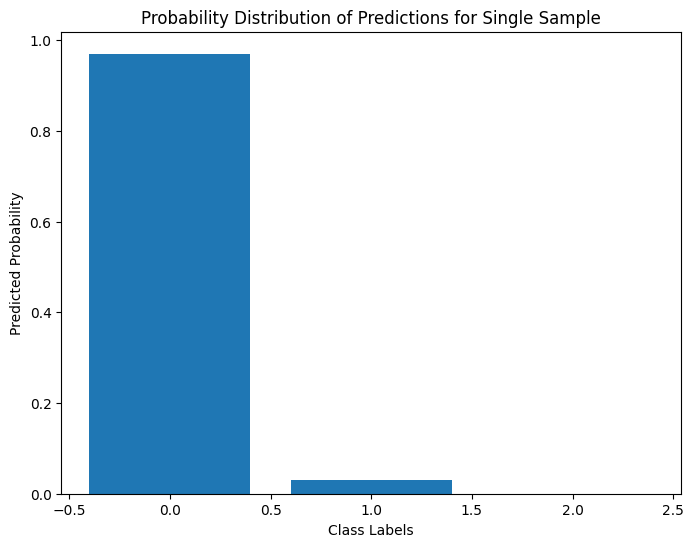

In [ ]:
predicted_probabilities = RF.predict_proba(np.array(X_test.iloc[33]).reshape(1,-1))
print(predicted_probabilities)
# Assuming 'RF.classes_' contains the class labels in the same order as predicted probabilities
class_labels = RF.classes_

# Plot the probability distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, predicted_probabilities[0])
plt.xlabel('Class Labels')
plt.ylabel('Predicted Probability')
plt.title('Probability Distribution of Predictions for Single Sample')
plt.show()

Accuracy on test set:  0.6969503417638254


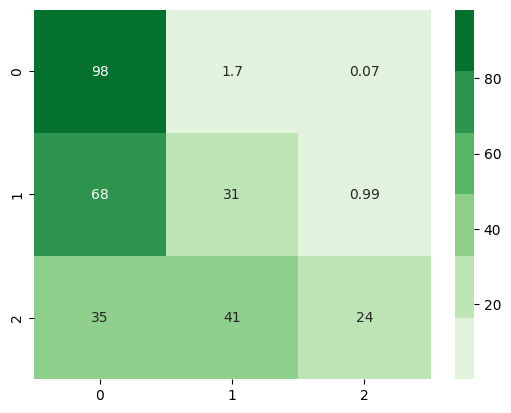

In [ ]:
# Predicting the labels using tarined instance `RF`
y_pred_RF = RF.predict(X_test)

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Greens")
sns.heatmap(cm, annot=True,cmap=colormap)

# Accuracy Score
print("Accuracy on test set: ", accuracy_score(y_test, y_pred_RF))

In [ ]:
print("Other relevant performance metrics")
print("Precision on test set: ", precision_score(y_test, y_pred_RF, average = 'weighted'))
print("Recall on test set: ", recall_score(y_test, y_pred_RF, average = 'weighted'))
print("F1 Score on test set: ", f1_score(y_test, y_pred_RF, average = 'weighted'))

Other relevant performance metrics
Precision on test set:  0.7140647538186101
Recall on test set:  0.6969503417638254
F1 Score on test set:  0.6508301316255409


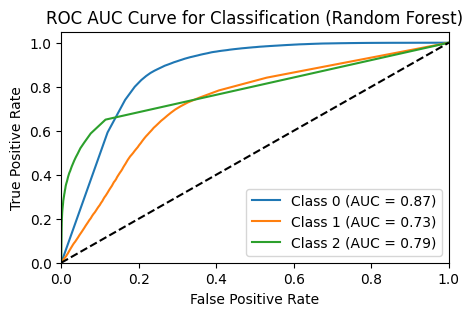

In [ ]:
n_classes = 3
y_score = RF.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for Classification (Random Forest)')
plt.legend(loc="lower right")
plt.show()

## **Hyperparameter optimization**
    
Since the previous model clearly overfits the training data, there is a need to perform some hyperparameter tuning to get optimised set of parameters for the model. Using random search with 3 fold cross validation, the tuning is performed

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators=[200, 400, 300]

# Maximum number of levels in tree
max_depth= [10, 20, 30]

# Max number of samples given to each tree
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [ ]:
# Using the defined parameter grid to search for optimised hyperparameters
# Initiliasing the model instance
rf = RandomForestClassifier()

'''
  Random search of parameters, using 3 fold cross validation,
  search across 100 different combinations, and use all available cores
'''

# Initilising the random search instance with estimator as `rf` and defined grid of parameters `random_grid`
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)

# Fitting the tuner instance for training
start_time = time.time()
rf_random.fit(X_train, y_train)

print(f"Time(in seconds) taken to train a Random Forest Classifier(Tuned): {time.time()-start_time}")

Time(in seconds) taken to train a Random Forest Classifier(Tuned): 1555.86385846138


In [ ]:
# Hyperparameters after tuning
print(f"Best hyperparameters for the model after tuning: {rf_random.best_params_}")
print(f"Best score achieved by the model after tuning: {rf_random.best_score_}")

Best hyperparameters for the model after tuning: {'n_estimators': 300, 'max_samples': 0.4, 'max_depth': 20}
Best score achieved by the model after tuning: 0.8840164880050386


In [ ]:
# training the Random Forest Instance with the best hyperparameters
RF_randSer = RandomForestClassifier(n_estimators=300,max_samples=0.4,max_depth= 20)
RF_randSer.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_samples=0.4, n_estimators=300)

### **Performance on Training Data**

Accuracy on training set (after random search hyperparameter tuning):  0.9548388303743476


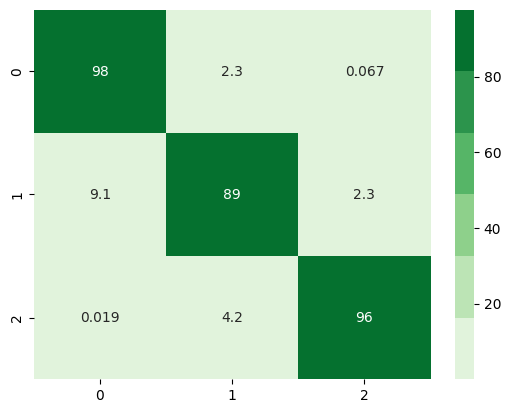

In [ ]:
# Predicting the labels using trained model
y_pred_RF = RF_randSer.predict(X_train)

# Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Greens")
sns.heatmap(cm, annot=True,cmap=colormap)

# Accuracy Score
print("Accuracy on training set (after random search hyperparameter tuning): ", accuracy_score(y_train, y_pred_RF))

In [ ]:
print("Other relevant performance metrics")
print("Precision on train set (after random search hyperparameter tuning): ", precision_score(y_train, y_pred_RF, average = 'weighted'))
print("Recall on train set (after random search hyperparameter tuning): ", recall_score(y_train, y_pred_RF, average = 'weighted'))
print("F1 Score on train set (after random search hyperparameter tuning): ", f1_score(y_train, y_pred_RF, average = 'weighted'))

Other relevant performance metrics
Precision on train set (after random search hyperparameter tuning):  0.9547877884113329
Recall on train set (after random search hyperparameter tuning):  0.9548388303743476
F1 Score on train set (after random search hyperparameter tuning):  0.9547904899946655


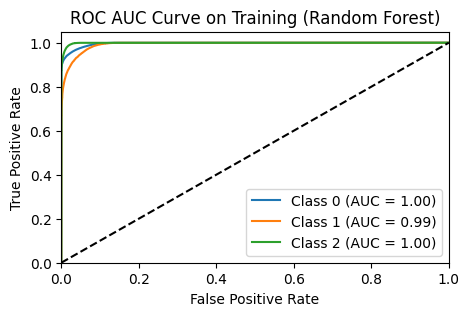

In [ ]:
n_classes = 3
y_score = RF_randSer.predict_proba(X_train)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve on Training (Random Forest)')
plt.legend(loc="lower right")
plt.show()

### **Performance on Testing Data**

Accuracy on training set (after random search hyperparameter tuning):  0.6960828241036445


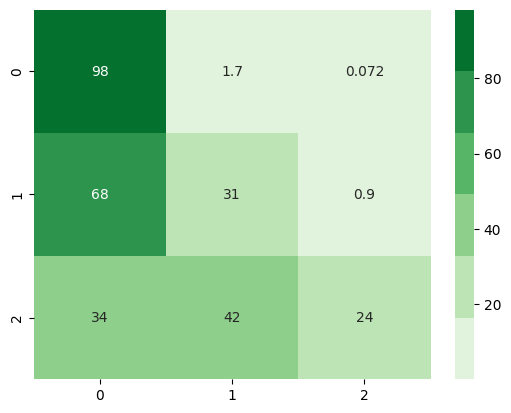

In [ ]:
# Predicting the labels using trained model
y_pred_RF = RF_randSer.predict(X_test)

# Confusion matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Greens")
sns.heatmap(cm, annot=True,cmap=colormap)

# Accuracy Score
print("Accuracy on training set (after random search hyperparameter tuning): ", accuracy_score(y_test, y_pred_RF))

In [ ]:
print("Other relevant performance metrics")
print("Precision on train set (after random search hyperparameter tuning): ", precision_score(y_test, y_pred_RF, average = 'weighted'))
print("Recall on train set (after random search hyperparameter tuning): ", recall_score(y_test, y_pred_RF, average = 'weighted'))
print("F1 Score on train set (after random search hyperparameter tuning): ", f1_score(y_test, y_pred_RF, average = 'weighted'))

Other relevant performance metrics
Precision on train set (after random search hyperparameter tuning):  0.7141849319728829
Recall on train set (after random search hyperparameter tuning):  0.6960828241036445
F1 Score on train set (after random search hyperparameter tuning):  0.649906082281225


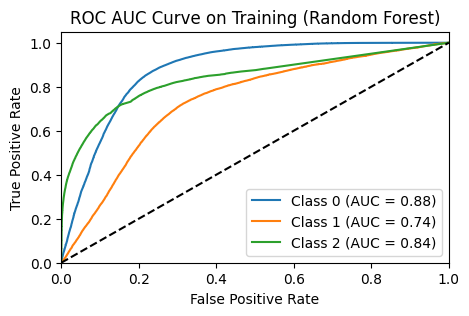

In [ ]:
n_classes = 3
y_score = RF_randSer.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC AUC curve
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve on Training (Random Forest)')
plt.legend(loc="lower right")
plt.show()